  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.008e-02 ...  1.996e+01  2.000e+01]
        y: [[ 1.200e+00  1.188e+00 ...  1.186e+00  1.149e+00]
            [ 0.000e+00 -5.720e-01 ... -6.986e-01 -1.145e+00]
            [ 1.000e+00  9.944e-01 ... -9.943e-01 -9.722e-01]
            [ 0.000e+00 -2.796e-01 ...  3.965e-01  7.127e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001FB63EEF150>
 t_events: None
 y_events: None
     nfev: 1550
     njev: 0
      nlu: 0


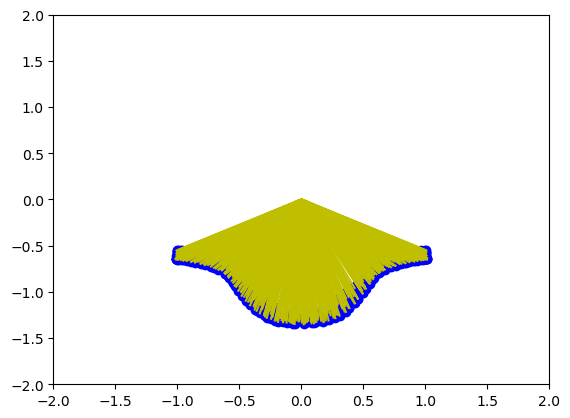

The theoretical and expected value of mechanical energy is -4.353955117009324
The average calculated mechanical energy is  -4.300729771926146
the Root Mean Square Error of mechanical energy is 0.06163391174116638
the standard deviation of mechanical energy is  0.003870907691326819


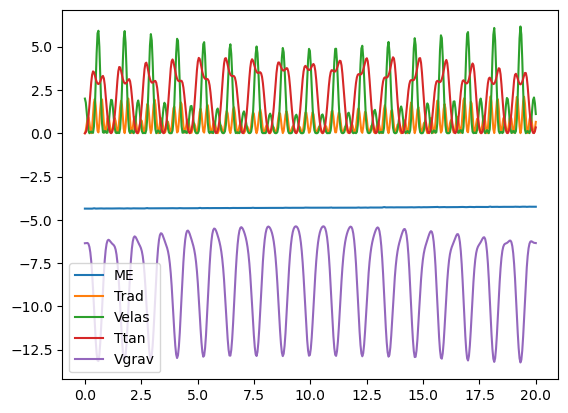

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import stats as st
import math
from astropy import constants as const
import pandas as pd
import scipy.linalg as lin


# Constants
k = 100
l0 = 1
m = 1
g = 9.8


# The initial value of l, dl, theta, dtheta respectively    
x0 = np.array([1.2, 0, 1, 0])


# Calculate theoretical mechanic energy
l, dl, theta, dtheta = x0
ME_theo = 1/2*m*l**2*dtheta**2 + 1/2*m*dl**2 - g*m*l*math.cos(theta) + 1/2*k*(l-l0)**2


# Control function, the deduction is given in another pdf.
def func(t, status):
    l, dl, theta, dtheta = status
    ddl = l*dtheta**2 - k/m*(l-l0) + m*g*math.cos(theta)
    ddtheta = -g/l*math.sin(theta) - 2*dl/l*dtheta
    return dl, ddl, dtheta, ddtheta


#Define the range of values to solve over
#Initial time
ti = 0 
#Final time
tf = 20 
# Duration
t_span = np.array([ti,tf])


#Define the range of values to be kept and output
NVals = 25*(tf-ti) #Number of values to sample when printing out at the end
tVals = np.linspace(ti,tf,NVals) 


# Use integrate.solve_ivp to solve the equation
result = integrate.solve_ivp(func,t_span,x0,method='RK45',t_eval=tVals, dense_output=True)
result_y = result.y
print(result)


# plt.plot(result["t"], result_y[3])
# plt.show()


# Fractures of energy
ME = np.zeros(NVals)
Trad = np.zeros(NVals)
Velas = np.zeros(NVals)
Ttan = np.zeros(NVals)
Vgrav = np.zeros(NVals)


# Draw result
for i in range (len(result_y[0])):
    plt.axis([-2, 2, -2, 2])

    l = result_y[0][i]
    dl = result_y[1][i]
    theta = result_y[2][i]
    dtheta = result_y[3][i]
    
    x = l*math.sin(theta)
    y = -l*math.cos(theta)
    
    
    ME[i] = 1/2*m*l**2*dtheta**2 + 1/2*m*dl**2 - g*m*l*math.cos(theta) + 1/2*k*(l-l0)**2
    Trad[i] = 1/2*m*dl**2
    Velas[i] = 1/2*k*(l-l0)**2
    Vgrav[i] = -g*m*l*math.cos(theta)
    Ttan[i] = 1/2*m*l**2*dtheta**2
    
    plt.plot([0, x], [0, y], c="y")
    plt.scatter(x, y, c="b")
    
    # plt.savefig("graph"+str(i)+".png", dpi=200)
    # plt.cla()

plt.show()

# Save figures for generating video
# plt.savefig("trace.png", dpi=200) 


# Draw energy over time
plt.plot(tVals, ME)
plt.plot(tVals, Trad)
plt.plot(tVals, Velas)
plt.plot(tVals, Ttan)
plt.plot(tVals, Vgrav)
plt.legend(['ME', 'Trad', 'Velas', 'Ttan', 'Vgrav'])


# Print diagnosis
print("The theoretical and expected value of mechanical energy is", ME_theo)
print("The average calculated mechanical energy is ", np.mean(ME))
print("the Root Mean Square Error of mechanical energy is", np.sqrt(np.mean((ME-ME_theo)**2))) # Describes accuracy
print("the standard deviation of mechanical energy is ", np.std(abs((ME-np.mean(ME))/np.mean(ME)))) # Describes preciseness